### Download images and dependencies

In [ ]:
!mkdir -p trash_images

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=10bY8McbYAhsXpW23kI2P17lDXC1K764Z' -O trash_images/image1.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1FBOq9FQS75hEdEoHHhISqW609jmlfH56' -O trash_images/image2.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1R_fv-9weEYR8K4vRCnWkvoWaVkL_tcYR' -O trash_images/image3.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1wOyH63hG0ANJwr5CFe1Wo6dDfNlOw8cq' -O trash_images/image4.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1mik0EVLXhV-rpcJVpfftayk7x1YAhqg6' -O trash_images/image5.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1lzHmeKKuVxxQ5NEPqEfwgcYc7pQayUXq' -O trash_images/image6.jpg
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1R5fdad6J2k9NSI3gRgjWzmFw1OKjKIrd' -O trash_images/image7.jpg


--2025-10-01 07:03:22--  https://drive.google.com/uc?export=download&id=10bY8McbYAhsXpW23kI2P17lDXC1K764Z
Resolving drive.google.com (drive.google.com)... 74.125.137.138, 74.125.137.113, 74.125.137.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=10bY8McbYAhsXpW23kI2P17lDXC1K764Z&export=download [following]
--2025-10-01 07:03:22--  https://drive.usercontent.google.com/download?id=10bY8McbYAhsXpW23kI2P17lDXC1K764Z&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.101.132, 2607:f8b0:4023:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.101.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3440253 (3.3M) [image/jpeg]
Saving to: ‘trash_images/image1.jpg’

trash_images/image1 100%[===================>]   3.28M  19.3MB/s   

In [ ]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1


### Main Code

Device set to use cuda:0


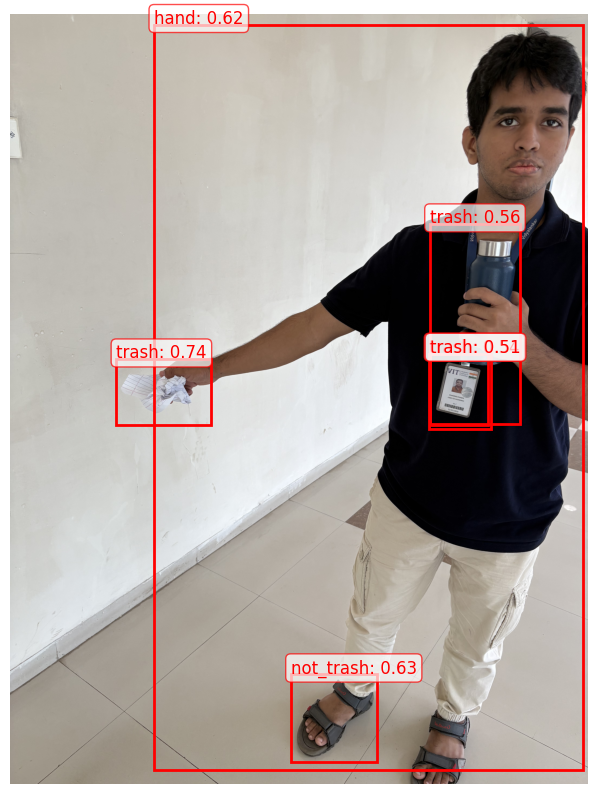

{
  "detections": [
    {
      "label": "trash",
      "confidence": 0.7354,
      "box": {
        "xmin": 787.0,
        "ymin": 2561.0,
        "xmax": 1489.0,
        "ymax": 3050.0
      }
    },
    {
      "label": "not_trash",
      "confidence": 0.6279,
      "box": {
        "xmin": 2082.0,
        "ymin": 4897.0,
        "xmax": 2723.0,
        "ymax": 5550.0
      }
    },
    {
      "label": "hand",
      "confidence": 0.6228,
      "box": {
        "xmin": 1068.0,
        "ymin": 80.0,
        "xmax": 4253.0,
        "ymax": 5606.0
      }
    },
    {
      "label": "trash",
      "confidence": 0.5566,
      "box": {
        "xmin": 3113.0,
        "ymin": 1559.0,
        "xmax": 3784.0,
        "ymax": 3041.0
      }
    },
    {
      "label": "trash",
      "confidence": 0.5379,
      "box": {
        "xmin": 3109.0,
        "ymin": 2518.0,
        "xmax": 3568.0,
        "ymax": 3077.0
      }
    },
    {
      "label": "trash",
      "confidence": 0.5093,
      "

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from transformers import pipeline
import json  # for pretty-printing the output

# Initialize the object detection pipeline with the model
pipe = pipeline("object-detection", model="mrdbourke/rt_detrv2_finetuned_trashify_box_detector_v1")

# Path to the image
image_path = "/content/trash_images/image6.jpg"
results = pipe(image_path)

# Open image for plotting
image = Image.open(image_path)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# List to store the detected items
detected_items = []

# Process each result
for result in results:
    label = result['label']
    score = float(result['score'])  # ensure float
    box = result['box']

    # Convert box values to float
    x_min = float(box['xmin'])
    y_min = float(box['ymin'])
    x_max = float(box['xmax'])
    y_max = float(box['ymax'])

    # Plot rectangle
    rect = plt.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Label the box
    ax.text(
        x_min,
        y_min - 10,
        f"{label}: {score:.2f}",
        color='red',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='red', boxstyle='round,pad=0.3')
    )

    # Add to detected items list
    detected_items.append({
        "label": label,
        "confidence": round(score, 4),
        "box": {
            "xmin": round(x_min, 2),
            "ymin": round(y_min, 2),
            "xmax": round(x_max, 2),
            "ymax": round(y_max, 2)
        }
    })

# Show image with detections
plt.axis('off')
plt.show()

# Get unique labels
found_labels = sorted(list(set(item["label"] for item in detected_items)))

# Build final JSON output
output = {
    "detections": detected_items,
    "summary": f"+1! Found the following items: {found_labels}, thank you for cleaning up your local area!"
}

# Print formatted JSON
print(json.dumps(output, indent=2))


### Code with point system

Device set to use cuda:0


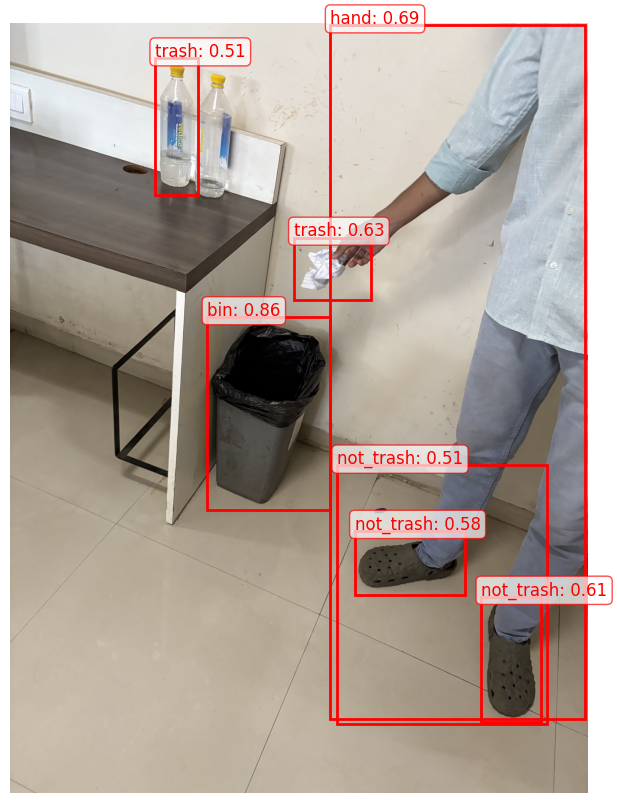

{
  "detections": [
    {
      "label": "bin",
      "confidence": 0.8581,
      "box": {
        "xmin": 1462.0,
        "ymin": 2181.0,
        "xmax": 2375.0,
        "ymax": 3609.0
      }
    },
    {
      "label": "hand",
      "confidence": 0.6928,
      "box": {
        "xmin": 2376.0,
        "ymin": 16.0,
        "xmax": 4267.0,
        "ymax": 5161.0
      }
    },
    {
      "label": "trash",
      "confidence": 0.6289,
      "box": {
        "xmin": 2103.0,
        "ymin": 1591.0,
        "xmax": 2674.0,
        "ymax": 2058.0
      }
    },
    {
      "label": "not_trash",
      "confidence": 0.6099,
      "box": {
        "xmin": 3494.0,
        "ymin": 4254.0,
        "xmax": 3942.0,
        "ymax": 5185.0
      }
    },
    {
      "label": "not_trash",
      "confidence": 0.5831,
      "box": {
        "xmin": 2556.0,
        "ymin": 3765.0,
        "xmax": 3375.0,
        "ymax": 4245.0
      }
    },
    {
      "label": "trash",
      "confidence": 0.5082,
    

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from transformers import pipeline
import json  # for pretty-printing the output

# Initialize the object detection pipeline with the model
pipe = pipeline("object-detection", model="mrdbourke/rt_detrv2_finetuned_trashify_box_detector_v1")

# Path to the image
image_path = "/content/trash_images/image2.jpg"
results = pipe(image_path)

# Open image for plotting
image = Image.open(image_path)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image)

# List to store the detected items
detected_items = []

for result in results:
    label = result['label']
    score = float(result['score'])  # ensure float
    box = result['box']

    x_min = float(box['xmin'])
    y_min = float(box['ymin'])
    x_max = float(box['xmax'])
    y_max = float(box['ymax'])

    rect = plt.Rectangle(
        (x_min, y_min),
        x_max - x_min,
        y_max - y_min,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    ax.text(
        x_min,
        y_min - 10,
        f"{label}: {score:.2f}",
        color='red',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='red', boxstyle='round,pad=0.3')
    )

    detected_items.append({
        "label": label,
        "confidence": round(score, 4),
        "box": {
            "xmin": round(x_min, 2),
            "ymin": round(y_min, 2),
            "xmax": round(x_max, 2),
            "ymax": round(y_max, 2)
        }
    })

plt.axis('off')
plt.show()

# Get unique labels
found_labels = sorted(list(set(item["label"] for item in detected_items)))

# Check if "trash bin" detected
if "bin" in found_labels:
    score_msg = "+1! Found the following items: "
    score_value = 1
else:
    score_msg = "No trash bin detected, -1 point"
    score_value = -1

output = {
    "detections": detected_items,
    "summary": f"{score_msg} {found_labels}" if score_value == 1 else score_msg
}

print(json.dumps(output, indent=2))
